In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import polars as pl
import polars.selectors as cs
import altair as alt
import plotly.express as px
import plotly.graph_objects as go
import great_tables as tg
import datetime as dt

In [2]:
df_path = r'../DATA/bitcoin_2010-07-17_2024-06-28.csv'

In [3]:
df = pl.read_csv(df_path)

In [4]:
df = df.with_columns(
    pl.col('Start').cast(pl.Date),
    pl.col('End').cast(pl.Date),
)

In [5]:
df['Start'].min(), df['Start'].max()

(datetime.date(2010, 7, 17), datetime.date(2024, 6, 27))

In [6]:
df.head()

shape: (5, 8)
┌────────────┬────────────┬──────────┬──────────┬──────────┬──────────┬───────────┬────────────┐
│ Start      ┆ End        ┆ Open     ┆ High     ┆ Low      ┆ Close    ┆ Volume    ┆ Market Cap │
│ ---        ┆ ---        ┆ ---      ┆ ---      ┆ ---      ┆ ---      ┆ ---       ┆ ---        │
│ date       ┆ date       ┆ f64      ┆ f64      ┆ f64      ┆ f64      ┆ f64       ┆ f64        │
╞════════════╪════════════╪══════════╪══════════╪══════════╪══════════╪═══════════╪════════════╡
│ 2024-06-27 ┆ 2024-06-28 ┆ 60882.9  ┆ 62338.43 ┆ 60666.19 ┆ 61646.05 ┆ 1.2159e11 ┆ 1.2084e12  │
│ 2024-06-26 ┆ 2024-06-27 ┆ 61733.99 ┆ 62357.58 ┆ 60761.24 ┆ 60761.24 ┆ 1.0176e11 ┆ 1.2105e12  │
│ 2024-06-25 ┆ 2024-06-26 ┆ 60317.99 ┆ 62231.16 ┆ 60272.58 ┆ 61789.98 ┆ 1.0503e11 ┆ 1.2084e12  │
│ 2024-06-24 ┆ 2024-06-25 ┆ 63168.03 ┆ 63316.01 ┆ 58946.24 ┆ 60382.81 ┆ 8.8284e10 ┆ 1.2111e12  │
│ 2024-06-23 ┆ 2024-06-24 ┆ 64276.04 ┆ 64521.03 ┆ 63290.43 ┆ 63290.43 ┆ 6.8539e10 ┆ 1.2653e12  │
└────────────┴────────────┴──────────┴──────────┴──────────┴──────────┴───────────┴────────────┘

In [7]:
df_start_end_time = df.select(
    pl.col('Start').dt.year().alias('StratYear'),
    pl.col('Start').dt.month().alias('StratMonth'),
    pl.col('Start').dt.day().alias('StratDay'),
    pl.col('Start').dt.weekday().alias('StartWeekday'),
    pl.col('End').dt.year().alias('EndYear'),
    pl.col('End').dt.month().alias('EndMonth'),
    pl.col('End').dt.day().alias('EndDay'),
    pl.col('End').dt.weekday().alias('EndWeekday'),
)

df.insert_column(1, df_start_end_time['StratYear'])
df.insert_column(2, df_start_end_time['StratMonth'])
df.insert_column(3, df_start_end_time['StratDay'])
df.insert_column(4, df_start_end_time['StartWeekday'])
df.insert_column(6, df_start_end_time['EndYear'])
df.insert_column(7, df_start_end_time['EndMonth'])
df.insert_column(8, df_start_end_time['EndDay'])

shape: (5_095, 15)
┌────────────┬───────────┬────────────┬──────────┬───┬──────────┬──────────┬───────────┬───────────┐
│ Start      ┆ StratYear ┆ StratMonth ┆ StratDay ┆ … ┆ Low      ┆ Close    ┆ Volume    ┆ Market    │
│ ---        ┆ ---       ┆ ---        ┆ ---      ┆   ┆ ---      ┆ ---      ┆ ---       ┆ Cap       │
│ date       ┆ i32       ┆ i8         ┆ i8       ┆   ┆ f64      ┆ f64      ┆ f64       ┆ ---       │
│            ┆           ┆            ┆          ┆   ┆          ┆          ┆           ┆ f64       │
╞════════════╪═══════════╪════════════╪══════════╪═══╪══════════╪══════════╪═══════════╪═══════════╡
│ 2024-06-27 ┆ 2024      ┆ 6          ┆ 27       ┆ … ┆ 60666.19 ┆ 61646.05 ┆ 1.2159e11 ┆ 1.2084e12 │
│ 2024-06-26 ┆ 2024      ┆ 6          ┆ 26       ┆ … ┆ 60761.24 ┆ 60761.24 ┆ 1.0176e11 ┆ 1.2105e12 │
│ 2024-06-25 ┆ 2024      ┆ 6          ┆ 25       ┆ … ┆ 60272.58 ┆ 61789.98 ┆ 1.0503e11 ┆ 1.2084e12 │
│ 2024-06-24 ┆ 2024      ┆ 6          ┆ 24       ┆ … ┆ 58946.24 ┆ 60382.81 ┆ 8.8284e10 ┆ 1.2111e12 │
│ 2024-06-23 ┆ 2024      ┆ 6          ┆ 23       ┆ … ┆ 63290.43 ┆ 63290.43 ┆ 6.8539e10 ┆ 1.2653e12 │
│ …          ┆ …         ┆ …          ┆ …        ┆ … ┆ …        ┆ …        ┆ …         ┆ …         │
│ 2010-07-21 ┆ 2010      ┆ 7          ┆ 21       ┆ … ┆ 0.0792   ┆ 0.0792   ┆ 0.0       ┆ 0.0       │
│ 2010-07-20 ┆ 2010      ┆ 7          ┆ 20       ┆ … ┆ 0.0747   ┆ 0.0747   ┆ 0.0       ┆ 0.0       │
│ 2010-07-19 ┆ 2010      ┆ 7          ┆ 19       ┆ … ┆ 0.0808   ┆ 0.0808   ┆ 0.0       ┆ 0.0       │
│ 2010-07-18 ┆ 2010      ┆ 7          ┆ 18       ┆ … ┆ 0.0858   ┆ 0.0858   ┆ 0.0       ┆ 0.0       │
│ 2010-07-17 ┆ 2010      ┆ 7          ┆ 17       ┆ … ┆ 0.05     ┆ 0.05     ┆ 0.0       ┆ 0.0       │
└────────────┴───────────┴────────────┴──────────┴───┴──────────┴──────────┴───────────┴───────────┘

In [8]:
df.columns

['Start',
 'StratYear',
 'StratMonth',
 'StratDay',
 'StartWeekday',
 'End',
 'EndYear',
 'EndMonth',
 'EndDay',
 'Open',
 'High',
 'Low',
 'Close',
 'Volume',
 'Market Cap']

In [9]:
X = df.select(cs.exclude(['Start', 'End', 'Close']))

In [10]:
y = df.get_column('Close')

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [16]:
scaler = StandardScaler()

In [17]:
scaled_X_test = scaler.fit_transform(X_test)

In [18]:
scaled_X_train = scaler.transform(X_train)

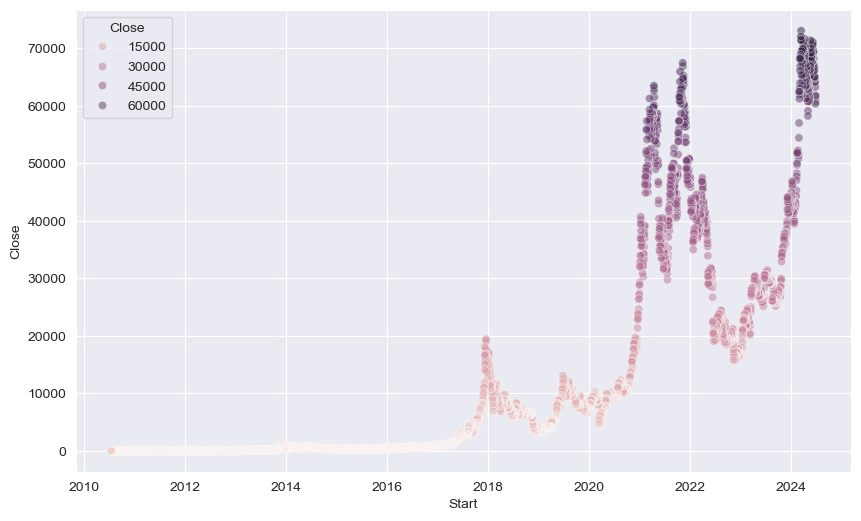

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Start', y='Close', hue='Close', alpha=0.5)
plt.show()

In [20]:
fig = px.scatter(
    data_frame=df,
    x='Start',
    y='Close',
    color='Close',
    title='Bitcoin Close Price'
).update_layout(
    width=1200,
    height=850,
)

fig.show()


   - `LinearRegression`
    - `RandomForestRegressor`
    - `GradientBoostingRegressor`

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
linear_model = LinearRegression(n_jobs=-1)

In [23]:
linear_model.fit(scaled_X_train, y_train)

LinearRegression(n_jobs=-1)

In [24]:
predictions = linear_model.predict(scaled_X_test)

In [25]:
weekdays_names = X_test.select(
    pl.when(pl.col('StartWeekday') == 1).then(pl.lit('Monday'))
    .when(pl.col('StartWeekday') == 2).then(pl.lit('Tuesday'))
    .when(pl.col('StartWeekday') == 3).then(pl.lit('Wednesday'))
    .when(pl.col('StartWeekday') == 4).then(pl.lit('Thursday'))
    .when(pl.col('StartWeekday') == 5).then(pl.lit('Friday'))
    .when(pl.col('StartWeekday') == 6).then(pl.lit('Saturday'))
    .when(pl.col('StartWeekday') == 7).then(pl.lit('Sunday'))
    .alias('Weekdays')
)


In [26]:
df_predictions = pl.DataFrame({
    'WeekDays': weekdays_names['Weekdays'],
    'Actual': y_test,
    'Predicted': predictions,
    'Error': y_test - predictions,
})
df_predictions.group_by(
    pl.col('WeekDays')
).agg(
    pl.mean('Actual').alias('ActualMean'),
    pl.mean('Predicted').alias('PredictedMean'),
    pl.mean('Error').alias('ErrorMean'),
).sort('ActualMean', descending=True)

shape: (7, 4)
┌───────────┬──────────────┬───────────────┬────────────┐
│ WeekDays  ┆ ActualMean   ┆ PredictedMean ┆ ErrorMean  │
│ ---       ┆ ---          ┆ ---           ┆ ---        │
│ str       ┆ f64          ┆ f64           ┆ f64        │
╞═══════════╪══════════════╪═══════════════╪════════════╡
│ Tuesday   ┆ 13960.35022  ┆ 13962.493543  ┆ -2.143323  │
│ Monday    ┆ 13873.448246 ┆ 13856.909889  ┆ 16.538357  │
│ Saturday  ┆ 12927.734553 ┆ 12930.425331  ┆ -2.690779  │
│ Sunday    ┆ 12028.621777 ┆ 12013.634238  ┆ 14.987539  │
│ Thursday  ┆ 11862.588522 ┆ 11904.654697  ┆ -42.066175 │
│ Wednesday ┆ 11469.072968 ┆ 11489.676463  ┆ -20.603495 │
│ Friday    ┆ 11202.725756 ┆ 11193.680226  ┆ 9.04553    │
└───────────┴──────────────┴───────────────┴────────────┘

In [27]:
fig = px.scatter(
    data_frame=df_predictions,
    x='Actual',
    y='Predicted',
    title='Linear Regression Predictions'
).update_traces(
    marker=dict(color='blue'),
    name='Predicted',
    selector=dict(name='Predicted')
).add_traces(
    px.scatter(
        data_frame=df_predictions,
        x='Actual',
        y='Actual',
        title='Actual Values'
    ).update_traces(
        marker=dict(color='red'),
        name='Actual'
    ).data
).update_layout(
    width=1200,
    height=850,
    xaxis_title="Actual",
    yaxis_title="Predicted",
    plot_bgcolor="black",
    legend_title="Values"
)

fig.show()

In [28]:
liner_model_error = df_predictions['Error'].abs().mean()
liner_model_error

122.54254825816685

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

In [47]:
liner_errors = pl.DataFrame({
    'Model': 'Linear Regression',
    'MAE': mean_absolute_error(y_test, predictions),
    'MSE': mean_squared_error(y_test, predictions),
    'RMSE': root_mean_squared_error(y_test, predictions),
    'R2': r2_score(y_test, predictions),
})
liner_errors.transpose(include_header=True, header_name='Features', column_names=['Error'])

shape: (5, 2)
┌──────────┬────────────────────┐
│ Features ┆ Error              │
│ ---      ┆ ---                │
│ str      ┆ str                │
╞══════════╪════════════════════╡
│ Model    ┆ Linear Regression  │
│ MAE      ┆ 123.72451441585152 │
│ MSE      ┆ 78932.33886636517  │
│ RMSE     ┆ 280.94899691290084 │
│ R2       ┆ 0.9997517595338111 │
└──────────┴────────────────────┘

In [31]:
from sklearn.preprocessing import PolynomialFeatures

In [32]:
data = []

for degree in range(1, 2):  # tested range (1, 31) best 1
    poly_features = PolynomialFeatures(degree=degree)
    X_test_poly = poly_features.fit_transform(X_test)
    poly_model = LinearRegression(n_jobs=-1)
    poly_model.fit(X_test_poly, y_test)
    poly_predictions = poly_model.predict(X_test_poly)
    poly_error = mean_absolute_error(y_test, poly_predictions)
    data.append({
        'Degree': degree,
        'Error': poly_error,
    })

In [35]:
data

[{'Degree': 1, 'Error': np.float64(123.72451441585152)},
 {'Degree': 2, 'Error': np.float64(189.42567326250003)},
 {'Degree': 3, 'Error': np.float64(3032.651277126724)},
 {'Degree': 4, 'Error': np.float64(3774.8287182595013)},
 {'Degree': 5, 'Error': np.float64(5090.801348708091)},
 {'Degree': 6, 'Error': np.float64(6091.027535038112)},
 {'Degree': 7, 'Error': np.float64(7118.08665740997)},
 {'Degree': 8, 'Error': np.float64(8029.707456703144)},
 {'Degree': 9, 'Error': np.float64(8770.075329867956)},
 {'Degree': 10, 'Error': np.float64(9285.806538607192)}]

In [37]:
poly_features = PolynomialFeatures(degree=1)
X_test_poly = poly_features.fit_transform(X_test)
poly_model = LinearRegression(n_jobs=-1)
poly_model.fit(X_test_poly, y_test)
predictions = poly_model.predict(X_test_poly)

In [48]:
poly_liner_model_error = pl.DataFrame({
    'Model': 'Poly Liner Model',
    'MAE': mean_absolute_error(y_test, predictions),
    'MSE': mean_squared_error(y_test, predictions),
    'RMSE': root_mean_squared_error(y_test, predictions),
    'R2': r2_score(y_test, predictions),
})
poly_liner_model_error

shape: (1, 5)
┌──────────────────┬────────────┬──────────────┬────────────┬──────────┐
│ Model            ┆ MAE        ┆ MSE          ┆ RMSE       ┆ R2       │
│ ---              ┆ ---        ┆ ---          ┆ ---        ┆ ---      │
│ str              ┆ f64        ┆ f64          ┆ f64        ┆ f64      │
╞══════════════════╪════════════╪══════════════╪════════════╪══════════╡
│ Poly Liner Model ┆ 123.724514 ┆ 78932.338866 ┆ 280.948997 ┆ 0.999752 │
└──────────────────┴────────────┴──────────────┴────────────┴──────────┘

In [ ]:
liner_errors

In [51]:
liner_poly_concat = pl.concat([liner_errors, poly_liner_model_error], how="vertical")
liner_poly_concat

shape: (2, 5)
┌───────────────────┬────────────┬──────────────┬────────────┬──────────┐
│ Model             ┆ MAE        ┆ MSE          ┆ RMSE       ┆ R2       │
│ ---               ┆ ---        ┆ ---          ┆ ---        ┆ ---      │
│ str               ┆ f64        ┆ f64          ┆ f64        ┆ f64      │
╞═══════════════════╪════════════╪══════════════╪════════════╪══════════╡
│ Linear Regression ┆ 123.724514 ┆ 78932.338866 ┆ 280.948997 ┆ 0.999752 │
│ Poly Liner Model  ┆ 123.724514 ┆ 78932.338866 ┆ 280.948997 ┆ 0.999752 │
└───────────────────┴────────────┴──────────────┴────────────┴──────────┘

In [53]:
from sklearn.model_selection import GridSearchCV

In [59]:
param_grid = {
    'n_estimators': [10, 50, 100, 200, 300, 400],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'n_jobs': [18],
}

In [60]:
from sklearn.ensemble import RandomForestRegressor

In [61]:
random_model = RandomForestRegressor(n_jobs=-1)

In [62]:
random_forest_cv = GridSearchCV(
    estimator=random_model,
    param_grid=param_grid,
    cv=5,
    n_jobs=18
)

In [63]:
random_forest_cv.fit(scaled_X_test, y_test)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1), n_jobs=18,
             param_grid={'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200, 300, 400],
                         'n_jobs': [18]})

In [64]:
random_forest_cv.best_params_

{'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200,
 'n_jobs': 18}

In [65]:
random_forest_cv.best_score_

np.float64(0.9993075217162065)

In [66]:
predictions = random_forest_cv.predict(scaled_X_test)

In [72]:
from sklearn.tree import plot_tree

In [74]:
tree = random_forest_cv.best_estimator_.estimators_[0]

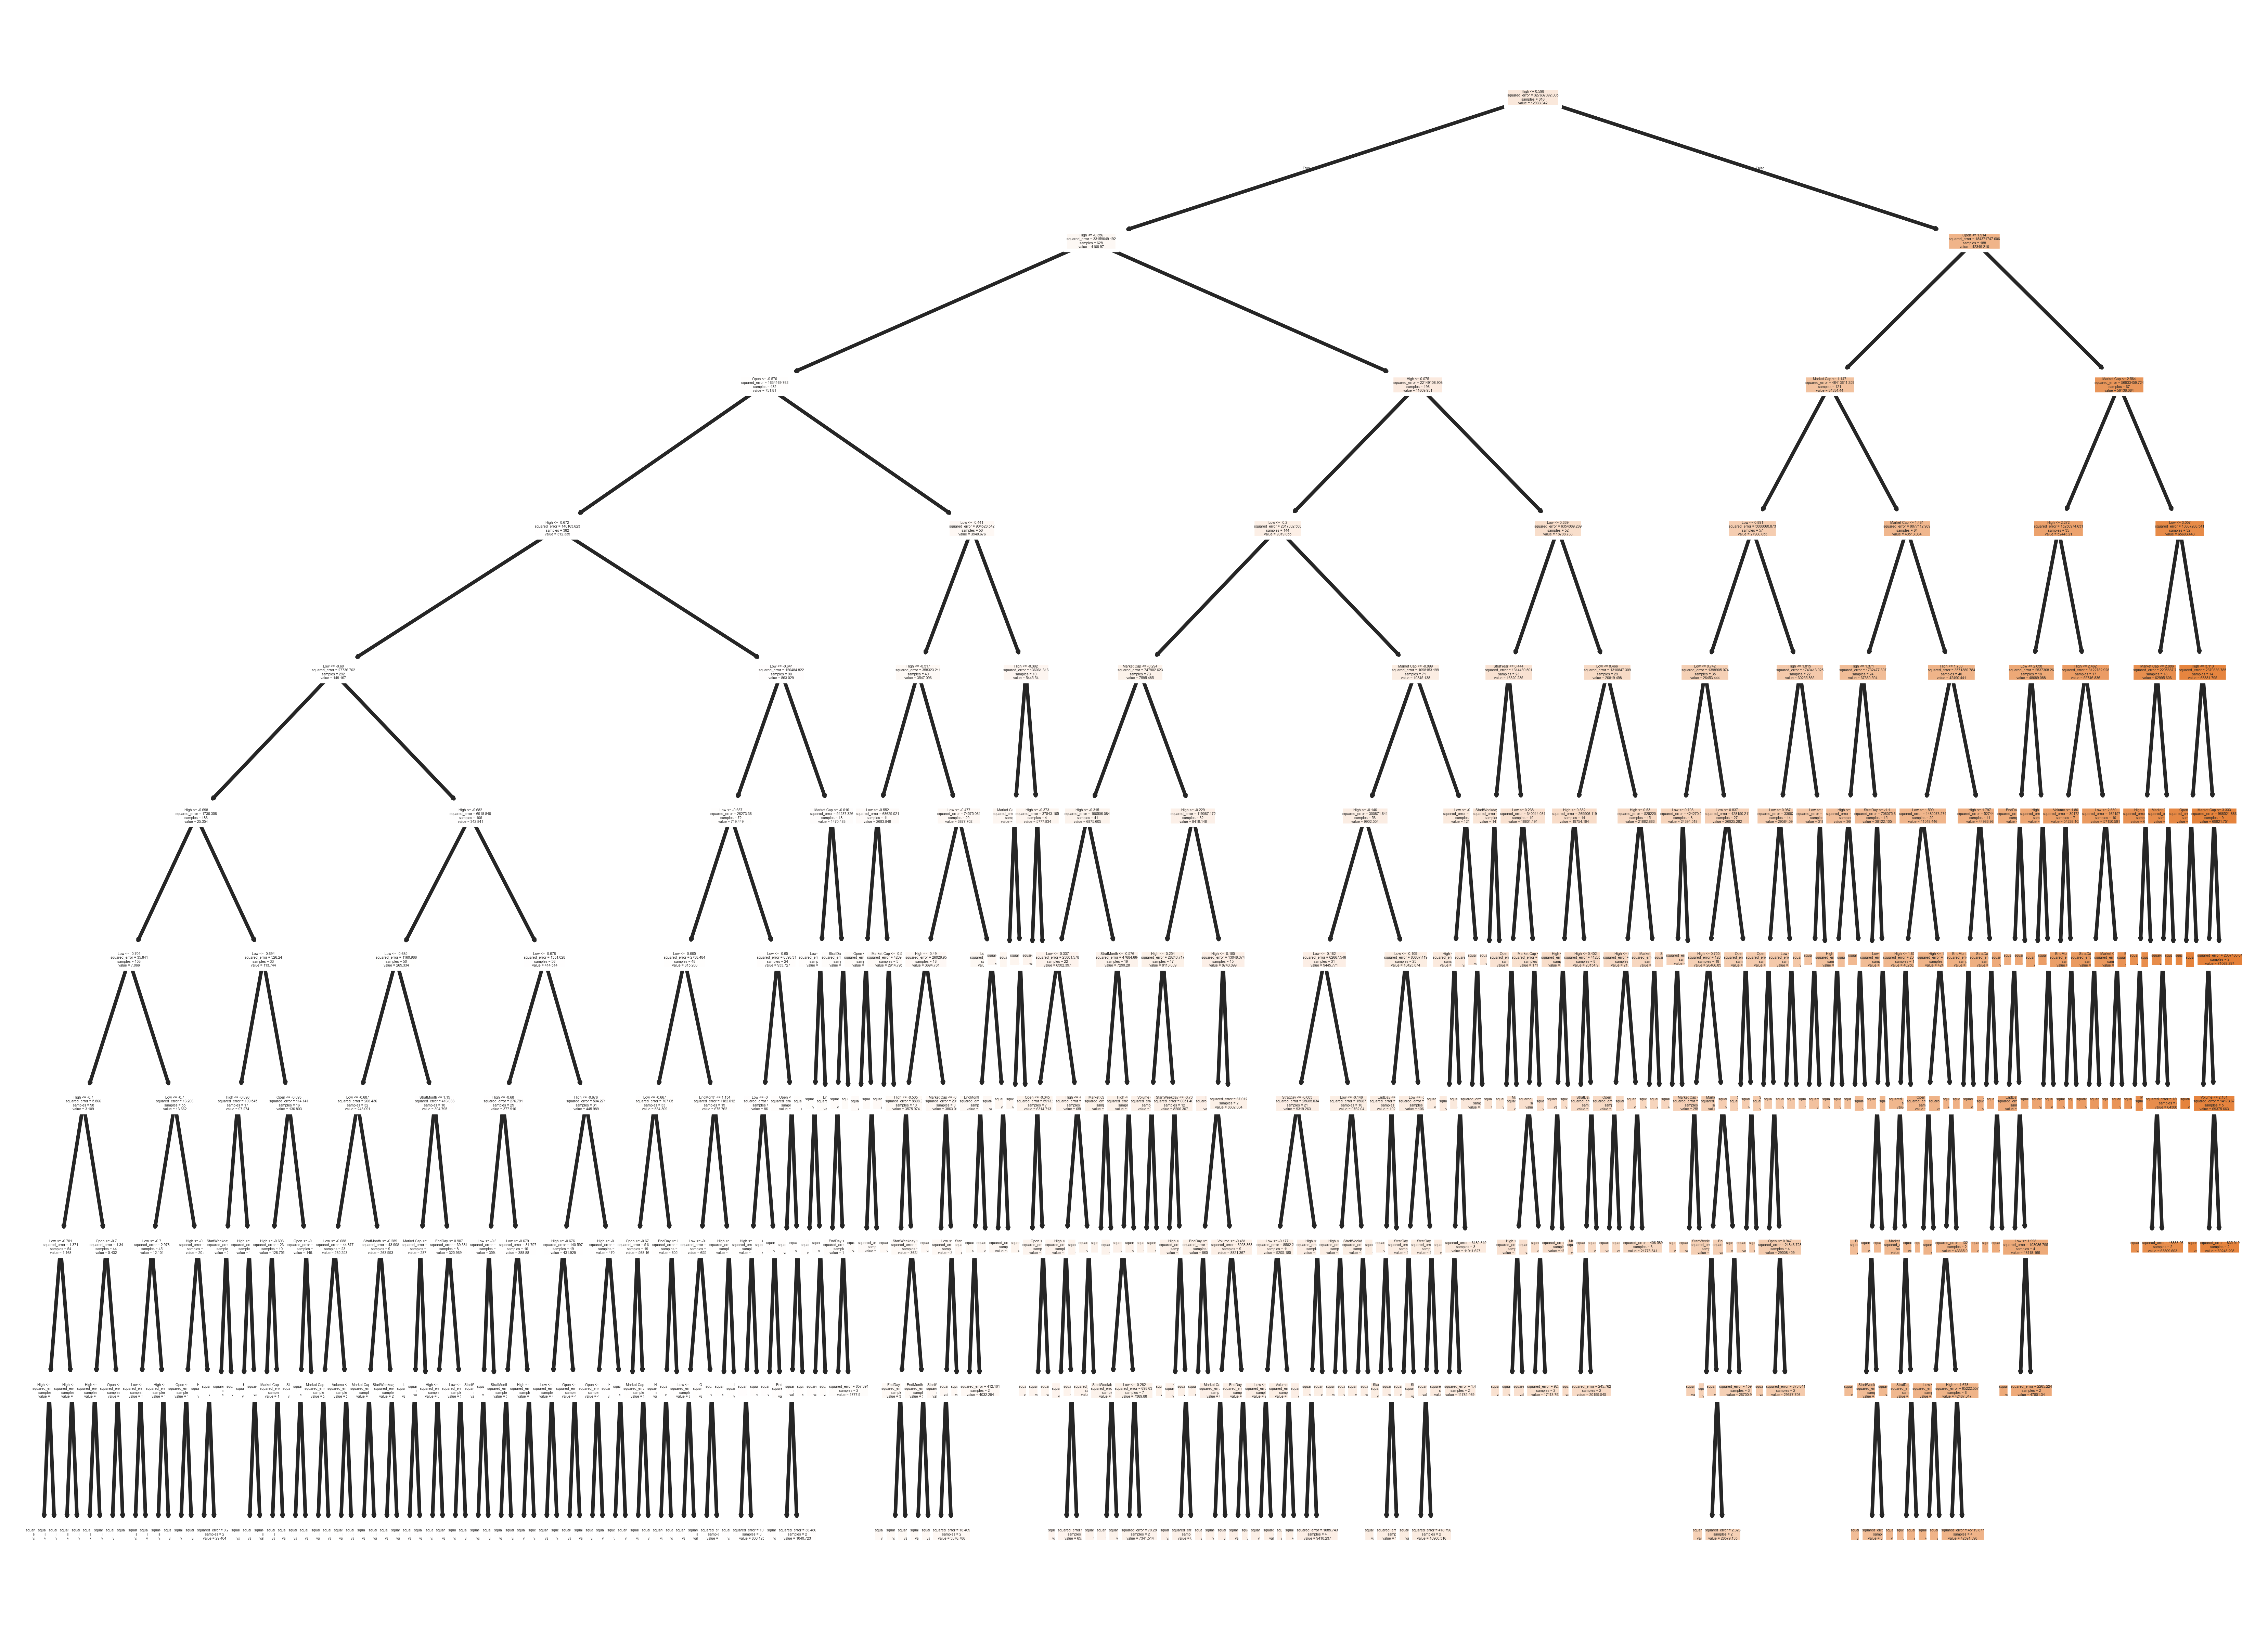

In [78]:
plt.figure(figsize=(11, 8), dpi=750)
plot_tree(tree, filled=True, feature_names=X_test.columns)
plt.show();

In [80]:
random_forest_error = pl.DataFrame({
    'Model': 'Random Forest',
    'MAE': mean_absolute_error(y_test, predictions),
    'MSE': mean_squared_error(y_test, predictions),
    'RMSE': root_mean_squared_error(y_test, predictions),
    'R2': r2_score(y_test, predictions),
})
random_forest_error

shape: (1, 5)
┌───────────────┬───────────┬─────────────┬────────────┬──────────┐
│ Model         ┆ MAE       ┆ MSE         ┆ RMSE       ┆ R2       │
│ ---           ┆ ---       ┆ ---         ┆ ---        ┆ ---      │
│ str           ┆ f64       ┆ f64         ┆ f64        ┆ f64      │
╞═══════════════╪═══════════╪═════════════╪════════════╪══════════╡
│ Random Forest ┆ 82.924264 ┆ 44095.11451 ┆ 209.988368 ┆ 0.999861 │
└───────────────┴───────────┴─────────────┴────────────┴──────────┘

In [82]:
combined_models_accuracy = pl.concat([liner_poly_concat, random_forest_error], how="vertical")
combined_models_accuracy

shape: (3, 5)
┌───────────────────┬────────────┬──────────────┬────────────┬──────────┐
│ Model             ┆ MAE        ┆ MSE          ┆ RMSE       ┆ R2       │
│ ---               ┆ ---        ┆ ---          ┆ ---        ┆ ---      │
│ str               ┆ f64        ┆ f64          ┆ f64        ┆ f64      │
╞═══════════════════╪════════════╪══════════════╪════════════╪══════════╡
│ Linear Regression ┆ 123.724514 ┆ 78932.338866 ┆ 280.948997 ┆ 0.999752 │
│ Poly Liner Model  ┆ 123.724514 ┆ 78932.338866 ┆ 280.948997 ┆ 0.999752 │
│ Random Forest     ┆ 82.924264  ┆ 44095.11451  ┆ 209.988368 ┆ 0.999861 │
└───────────────────┴────────────┴──────────────┴────────────┴──────────┘

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor